In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
df = pd.read_csv('Advertising.csv')
df.head(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
5,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0
6,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,2016-01-28 20:59:32,0
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 01:40:15,1
8,74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,2016-04-18 09:33:42,0
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,2016-07-11 01:42:51,0


In [4]:
df.shape

(1000, 10)

In [6]:
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [9]:
df['Male'].value_counts()

0    519
1    481
Name: Male, dtype: int64

In [7]:
df[['Male','Clicked on Ad']].groupby(['Male']).mean().sort_values(by='Clicked on Ad', ascending=False)

,Clicked on Ad
Male,
0,0.518304
1,0.480249


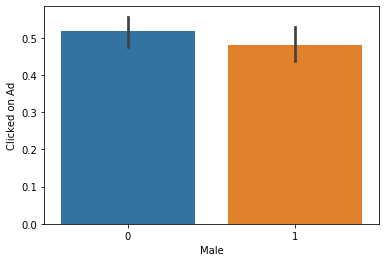

In [24]:
sns.barplot(data=df, x='Male', y='Clicked on Ad')

In [27]:
#df[['Country','Clicked on Ad']].groupby(['Country']).mean().sort_values(by='Clicked on Ad', ascending=False).head()

In [28]:
df['Country'].value_counts()

Czech Republic    9
France            9
Liberia           8
Senegal           8
Afghanistan       8
                 ..
Germany           1
Kiribati          1
Bermuda           1
Mozambique        1
Cape Verde        1
Name: Country, Length: 237, dtype: int64

In [29]:
df['Country'].count()

1000

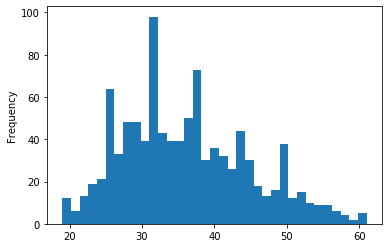

In [33]:
df['Age'].plot.hist(bins=35)

In [40]:
#df[['Area Income', 'Age']].groupby(['Age']).mean().sort_values(by='Area Income', ascending=False).head()

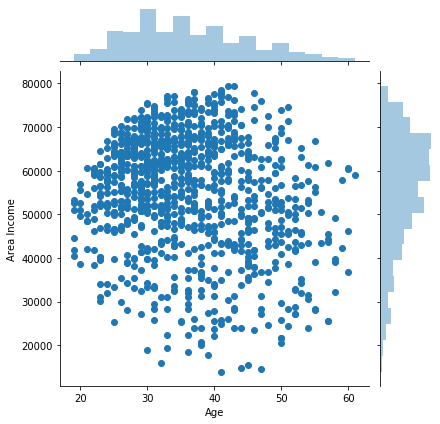

In [38]:
sns.jointplot(x='Age', y='Area Income', data=df)

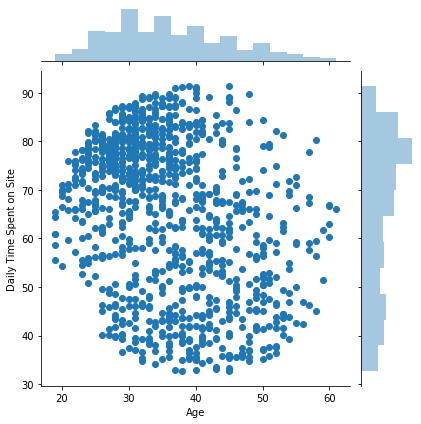

In [41]:
sns.jointplot(x='Age', y='Daily Time Spent on Site', data=df)

In [43]:
# Dropping unnecessary features 


df.drop(['Ad Topic Line','Country','Timestamp','City'], axis=1)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0
...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,1
996,51.30,45,67782.17,134.42,1,1
997,51.63,51,42415.72,120.37,1,1
998,55.55,19,41920.79,187.95,0,0


In [58]:
# Machine Learning

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

In [47]:
X = df[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','Male']]
y = df['Clicked on Ad']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [51]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
predictions = logmodel.predict(X_test)

In [56]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [59]:
print(confusion_matrix(y_test,predictions))

[[149   8]
 [ 15 128]]
